# Enron dataset

## Data analysis

Index
1. Overview
2. Data wrangling
3. Data visualization
4. Statistical correlation

In [17]:
import sys
import pickle

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit

### Load the dictionary containing the dataset
import pandas as pd
#importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import numpy as np

In [18]:
with open("P:/Nanodegree/ML/ud120-projects/tools/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [19]:
enron_df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=float)

I am using the enron61702insiderpay.pdf file to check the values, to facilitate the conference, I will organize the columns of the dataset in the same sequence as the file.

In [20]:
print list(enron_df.columns.values)

['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [21]:
# Change enron_df columns order
enron_df = enron_df[['salary', 'bonus', 'long_term_incentive', 'deferred_income','deferral_payments',
                     'loan_advances', 'other', 'expenses', 'director_fees','total_payments',    
                     'exercised_stock_options','restricted_stock', 'restricted_stock_deferred', 'total_stock_value',
                     'to_messages','shared_receipt_with_poi', 'from_messages','from_this_person_to_poi', 
                     'poi', 'email_address', 'from_poi_to_this_person']]

# 1. Overview

In [22]:
(enron_df.isnull().sum() / 146)*100

salary                       34.931507
bonus                        43.835616
long_term_incentive          54.794521
deferred_income              66.438356
deferral_payments            73.287671
loan_advances                97.260274
other                        36.301370
expenses                     34.931507
director_fees                88.356164
total_payments               14.383562
exercised_stock_options      30.136986
restricted_stock             24.657534
restricted_stock_deferred    87.671233
total_stock_value            13.698630
to_messages                  41.095890
shared_receipt_with_poi      41.095890
from_messages                41.095890
from_this_person_to_poi      41.095890
poi                           0.000000
email_address                 0.000000
from_poi_to_this_person      41.095890
dtype: float64

In [24]:
enron_df.fillna(0 , inplace=True)

In [25]:
# Number of POIs
enron_df.poi.value_counts()

0.0    128
1.0     18
Name: poi, dtype: int64

In [26]:
enron_df.dtypes.index

Index([u'salary', u'bonus', u'long_term_incentive', u'deferred_income',
       u'deferral_payments', u'loan_advances', u'other', u'expenses',
       u'director_fees', u'total_payments', u'exercised_stock_options',
       u'restricted_stock', u'restricted_stock_deferred', u'total_stock_value',
       u'to_messages', u'shared_receipt_with_poi', u'from_messages',
       u'from_this_person_to_poi', u'poi', u'email_address',
       u'from_poi_to_this_person'],
      dtype='object')

In [27]:
# Data overview
enron_df.head()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,...,126027.0,-126027.0,1729541.0,2902.0,1407.0,2195.0,65.0,0.0,phillip.allen@enron.com,47.0
BADUM JAMES P,0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,...,0.0,0.0,257817.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BANNANTINE JAMES M,477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,916197.0,...,1757552.0,-560222.0,5243487.0,566.0,465.0,29.0,0.0,0.0,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,...,3942714.0,0.0,10623258.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BAY FRANKLIN R,239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,827696.0,...,145796.0,-82782.0,63014.0,0.0,0.0,0.0,0.0,0.0,frank.bay@enron.com,0.0


In [28]:
# Number of rows and columns
enron_df.shape

(146, 21)

In [29]:
# Columns types
enron_df.dtypes

salary                       float64
bonus                        float64
long_term_incentive          float64
deferred_income              float64
deferral_payments            float64
loan_advances                float64
other                        float64
expenses                     float64
director_fees                float64
total_payments               float64
exercised_stock_options      float64
restricted_stock             float64
restricted_stock_deferred    float64
total_stock_value            float64
to_messages                  float64
shared_receipt_with_poi      float64
from_messages                float64
from_this_person_to_poi      float64
poi                          float64
email_address                 object
from_poi_to_this_person      float64
dtype: object

In [30]:
enron_df.describe()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,3.658114e+05,1.333474e+06,6.646839e+05,-3.827622e+05,4.387965e+05,1.149658e+06,5.854318e+05,7.074827e+04,1.942249e+04,4.350622e+06,4.182736e+06,1.749257e+06,2.051637e+04,5.846018e+06,1221.589041,692.986301,358.602740,24.287671,0.123288,38.226027
std,2.203575e+06,8.094029e+06,4.046072e+06,2.378250e+06,2.741325e+06,9.649342e+06,3.682345e+06,4.327163e+05,1.190543e+05,2.693448e+07,2.607040e+07,1.089995e+07,1.439661e+06,3.624681e+07,2226.770637,1072.969492,1441.259868,79.278206,0.329899,73.901124
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.799289e+07,-1.025000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-7.576788e+06,-4.409300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.394475e+04,0.000000e+00,8.115000e+03,0.000000e+00,2.288695e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.105960e+05,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.595000e+02,2.018200e+04,0.000000e+00,9.413595e+05,6.082935e+05,3.605280e+05,0.000000e+00,9.659550e+05,289.000000,102.500000,16.500000,0.000000,0.000000,2.500000
75%,2.708505e+05,8.000000e+05,3.750648e+05,0.000000e+00,9.684500e+03,0.000000e+00,1.506065e+05,5.374075e+04,0.000000e+00,1.968287e+06,1.714221e+06,8.145280e+05,0.000000e+00,2.319991e+06,1585.750000,893.500000,51.250000,13.750000,0.000000,40.750000
max,2.670423e+07,9.734362e+07,4.852193e+07,0.000000e+00,3.208340e+07,8.392500e+07,4.266759e+07,5.235198e+06,1.398517e+06,3.098866e+08,3.117640e+08,1.303223e+08,1.545629e+07,4.345095e+08,15149.000000,5521.000000,14368.000000,609.000000,1.000000,528.000000


In [31]:
enron_df['total_stock_value'].nlargest(10)

TOTAL                 434509511.0
LAY KENNETH L          49110078.0
HIRKO JOSEPH           30766064.0
SKILLING JEFFREY K     26093672.0
PAI LOU L              23817930.0
RICE KENNETH D         22542539.0
WHITE JR THOMAS E      15144123.0
FREVERT MARK A         14622185.0
YEAGER F SCOTT         11884758.0
BAXTER JOHN C          10623258.0
Name: total_stock_value, dtype: float64

In [32]:
enron_df['total_payments'].nlargest(20)

TOTAL                 309886585.0
LAY KENNETH L         103559793.0
FREVERT MARK A         17252530.0
BHATNAGAR SANJAY       15456290.0
LAVORATO JOHN J        10425757.0
SKILLING JEFFREY K      8682716.0
MARTIN AMANDA K         8407016.0
BAXTER JOHN C           5634343.0
BELDEN TIMOTHY N        5501630.0
DELAINEY DAVID W        4747979.0
WHALLEY LAWRENCE G      4677574.0
ALLEN PHILLIP K         4484442.0
SHERRIFF JOHN R         4335388.0
MCMAHON JEFFREY         4099771.0
HAEDICKE MARK E         3859065.0
FALLON JAMES B          3676340.0
KITCHEN LOUISE          3471141.0
MULLER MARK S           3202070.0
HORTON STANLEY C        3131860.0
PAI LOU L               3123383.0
Name: total_payments, dtype: float64

In [33]:
#enron_df[( enron_df > enron_df.stack().quantile(.75))]
enron_df[enron_df.total_payments > enron_df.total_payments.quantile(.75)]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,...,126027.0,-126027.0,1729541.0,2902.0,1407.0,2195.0,65.0,0.0,phillip.allen@enron.com,47.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,...,3942714.0,0.0,10623258.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BELDEN TIMOTHY N,213999.0,5249999.0,0.0,-2334434.0,2144013.0,0.0,210698.0,17355.0,0.0,5501630.0,...,157569.0,0.0,1110705.0,7991.0,5521.0,484.0,108.0,1.0,tim.belden@enron.com,228.0
BHATNAGAR SANJAY,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0,...,-2604490.0,15456290.0,0.0,523.0,463.0,29.0,1.0,0.0,sanjay.bhatnagar@enron.com,0.0
BIBI PHILIPPE A,213625.0,1000000.0,369721.0,0.0,0.0,0.0,425688.0,38559.0,0.0,2047593.0,...,378082.0,0.0,1843816.0,1607.0,1336.0,40.0,8.0,0.0,philippe.bibi@enron.com,23.0
BLACHMAN JEREMY M,248546.0,850000.0,831809.0,0.0,0.0,0.0,272.0,84208.0,0.0,2014835.0,...,189041.0,0.0,954354.0,2475.0,2326.0,14.0,2.0,0.0,jeremy.blachman@enron.com,25.0
BOWEN JR RAYMOND M,278601.0,1350000.0,974293.0,-833.0,0.0,0.0,1621.0,65907.0,0.0,2669589.0,...,252055.0,0.0,252055.0,1858.0,1593.0,27.0,15.0,1.0,raymond.bowen@enron.com,140.0
BUY RICHARD B,330546.0,900000.0,769862.0,-694862.0,649584.0,0.0,400572.0,0.0,0.0,2355702.0,...,901657.0,0.0,3444470.0,3523.0,2333.0,1053.0,71.0,0.0,rick.buy@enron.com,156.0
DELAINEY DAVID W,365163.0,3000000.0,1294981.0,0.0,0.0,0.0,1661.0,86174.0,0.0,4747979.0,...,1323148.0,0.0,3614261.0,3093.0,2097.0,3069.0,609.0,1.0,david.delainey@enron.com,66.0
DIMICHELE RICHARD G,262788.0,1000000.0,694862.0,0.0,0.0,0.0,374689.0,35812.0,0.0,2368151.0,...,126027.0,0.0,8317782.0,0.0,0.0,0.0,0.0,0.0,richard.dimichele@enron.com,0.0


In [34]:
financial_df = enron_df[['total_payments', 'total_stock_value', 'exercised_stock_options', 'salary', 'bonus']]

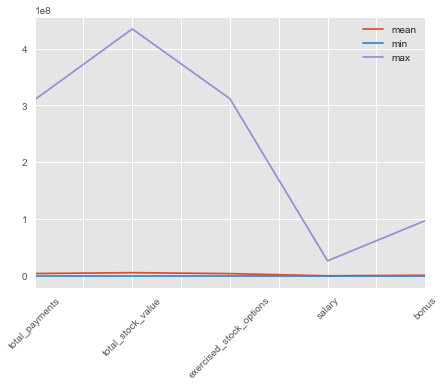

In [35]:
plt.style.use('ggplot')
financial_df.describe().T.drop(['count','std', '25%', '50%', '75%'], axis=1).plot(rot=45, figsize=(7,5))

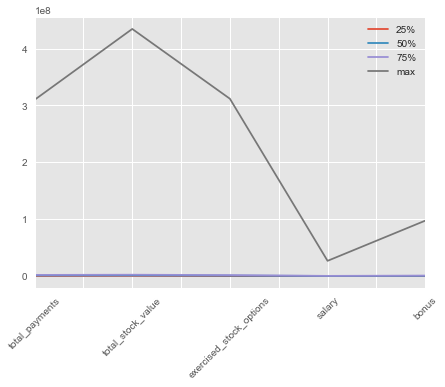

In [72]:
financial_df.describe().T.drop(['count','std', 'min', 'mean'], axis=1).plot(rot=45, figsize=(7,5));

# 2. Data wrangling

In [37]:
enron_df.total_payments.sort_values(ascending=False).head()

TOTAL               309886585.0
LAY KENNETH L       103559793.0
FREVERT MARK A       17252530.0
BHATNAGAR SANJAY     15456290.0
LAVORATO JOHN J      10425757.0
Name: total_payments, dtype: float64

Does seen quite right, we have a outlier called TOTAL. This doesn't looks like a person name, in fact is the sum of all values. The second largest value receve was Kenneth Lay, but, as you know this make perfect sense since he was the CEO and chairman of Enron. We gonna delete TOTAL row.

In [38]:
enron_df.drop('TOTAL',axis=0, inplace=True)

By now I alredy know that total_payments and total_stock_value are the sum of other values, so I'll search for emptys columns, cause, there a chance they not agreggate value to result.

In [39]:
enron_df[(enron_df.total_payments == 0) & (enron_df.total_stock_value == 0)]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,email_address,from_poi_to_this_person
CHAN RONNIE,0.0,0.0,0.0,-98784.0,0.0,0.0,0.0,0.0,98784.0,0.0,...,32460.0,-32460.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
LOCKHART EUGENE E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
POWERS WILLIAM,0.0,0.0,0.0,-17500.0,0.0,0.0,0.0,0.0,17500.0,0.0,...,0.0,0.0,0.0,653.0,12.0,26.0,0.0,0.0,ken.powers@enron.com,0.0


First of all "LOCKHART EUGENE E" doesn't have any value assign. I do not need to keep it in dataset.
"CHAN RONNIE" and "POWERS WILLIAM" had stock or income put off to a later time causing a total payments equal a 0. Differently of "POWERS WILLIAM", "CHAN RONNIE" had no message sent or received, his presence on the data set is not justified. For now, POWERS WILLIAM is save, I don't know yet if I'll need with shared_receipt_with_poi. None of them are POI.


In [40]:
# Delete two employees from dataset
enron_df.drop(["LOCKHART EUGENE E", "CHAN RONNIE" ],axis=0, inplace=True)

In [41]:
# Check sum stock values
dif_values = []
for index, row in enron_df.iterrows():    
    temp_stock = (enron_df.loc[index].restricted_stock + 
                  enron_df.loc[index].restricted_stock_deferred + 
                  enron_df.loc[index].exercised_stock_options)
            
    if temp_stock <> enron_df.loc[index].total_stock_value:
        #dif_values.append([index,  poi_df.loc[index].total_stock_value, temp_stock])
        dif_values.append(enron_df.loc[index].name)      

Let's check if any inconsistencies have been found.

In [42]:
print dif_values

['BELFER ROBERT', 'BHATNAGAR SANJAY']


In [43]:
enron_df.loc[dif_values[0]]

salary                            0
bonus                             0
long_term_incentive               0
deferred_income                   0
deferral_payments           -102500
loan_advances                     0
other                             0
expenses                          0
director_fees                  3285
total_payments               102500
exercised_stock_options        3285
restricted_stock                  0
restricted_stock_deferred     44093
total_stock_value            -44093
to_messages                       0
shared_receipt_with_poi           0
from_messages                     0
from_this_person_to_poi           0
poi                               0
email_address                   NaN
from_poi_to_this_person           0
Name: BELFER ROBERT, dtype: object

When we compare this result with enron61702insiderpay.pdf, It's possible to realize that the exercised_stock_options has a incorrect value recorded. 

In [44]:
enron_df.set_value(dif_values[0], 
                 ['deferred_income','deferral_payments', 'expenses', 'director_fees', 'total_payments',
                  'exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value'], 
                 [-102500,0,3285,102500, 3285,0, 44093,-44093,0])

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,...,126027.0,-126027.0,1729541.0,2902.0,1407.0,2195.0,65.0,0.0,phillip.allen@enron.com,47.0
BADUM JAMES P,0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,...,0.0,0.0,257817.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BANNANTINE JAMES M,477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,916197.0,...,1757552.0,-560222.0,5243487.0,566.0,465.0,29.0,0.0,0.0,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,...,3942714.0,0.0,10623258.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BAY FRANKLIN R,239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,827696.0,...,145796.0,-82782.0,63014.0,0.0,0.0,0.0,0.0,0.0,frank.bay@enron.com,0.0
BAZELIDES PHILIP J,80818.0,0.0,93750.0,0.0,684694.0,0.0,874.0,0.0,0.0,860136.0,...,0.0,0.0,1599641.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BECK SALLY W,231330.0,700000.0,0.0,0.0,0.0,0.0,566.0,37172.0,0.0,969068.0,...,126027.0,0.0,126027.0,7315.0,2639.0,4343.0,386.0,0.0,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,5249999.0,0.0,-2334434.0,2144013.0,0.0,210698.0,17355.0,0.0,5501630.0,...,157569.0,0.0,1110705.0,7991.0,5521.0,484.0,108.0,1.0,tim.belden@enron.com,228.0
BELFER ROBERT,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,...,44093.0,-44093.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BERBERIAN DAVID,216582.0,0.0,0.0,0.0,0.0,0.0,0.0,11892.0,0.0,228474.0,...,869220.0,0.0,2493616.0,0.0,0.0,0.0,0.0,0.0,david.berberian@enron.com,0.0


In [45]:
enron_df.loc[dif_values[1]]

salary                                                0
bonus                                                 0
long_term_incentive                                   0
deferred_income                                       0
deferral_payments                                     0
loan_advances                                         0
other                                            137864
expenses                                              0
director_fees                                    137864
total_payments                              1.54563e+07
exercised_stock_options                     2.60449e+06
restricted_stock                           -2.60449e+06
restricted_stock_deferred                   1.54563e+07
total_stock_value                                     0
to_messages                                         523
shared_receipt_with_poi                             463
from_messages                                        29
from_this_person_to_poi                         

In [46]:
enron_df.set_value(dif_values[1], 
                 ['other', 'expenses', 'director_fees', 'total_payments',
                  'exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value'],
                  [0,137864, 0, 137864, 15456290, 2604490, -2604490, 15456290])

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,...,126027.0,-126027.0,1729541.0,2902.0,1407.0,2195.0,65.0,0.0,phillip.allen@enron.com,47.0
BADUM JAMES P,0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,...,0.0,0.0,257817.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BANNANTINE JAMES M,477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,916197.0,...,1757552.0,-560222.0,5243487.0,566.0,465.0,29.0,0.0,0.0,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,...,3942714.0,0.0,10623258.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BAY FRANKLIN R,239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,827696.0,...,145796.0,-82782.0,63014.0,0.0,0.0,0.0,0.0,0.0,frank.bay@enron.com,0.0
BAZELIDES PHILIP J,80818.0,0.0,93750.0,0.0,684694.0,0.0,874.0,0.0,0.0,860136.0,...,0.0,0.0,1599641.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BECK SALLY W,231330.0,700000.0,0.0,0.0,0.0,0.0,566.0,37172.0,0.0,969068.0,...,126027.0,0.0,126027.0,7315.0,2639.0,4343.0,386.0,0.0,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,5249999.0,0.0,-2334434.0,2144013.0,0.0,210698.0,17355.0,0.0,5501630.0,...,157569.0,0.0,1110705.0,7991.0,5521.0,484.0,108.0,1.0,tim.belden@enron.com,228.0
BELFER ROBERT,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,...,44093.0,-44093.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BERBERIAN DAVID,216582.0,0.0,0.0,0.0,0.0,0.0,0.0,11892.0,0.0,228474.0,...,869220.0,0.0,2493616.0,0.0,0.0,0.0,0.0,0.0,david.berberian@enron.com,0.0


In [47]:
#for i  in poi_df.index:
dif_values = []
for index, row in enron_df.iterrows():    
    temp_payments = 0
    temp_payments = sum(enron_df.loc[index][0:9])        
    if temp_payments <> enron_df.loc[index].total_payments:
        dif_values.append([index,  enron_df.loc[index].total_payments, temp_payments])
print dif_values

[]


In [48]:
enron_df[enron_df.email_address == "NaN"]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,email_address,from_poi_to_this_person
BADUM JAMES P,0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,...,0.0,0.0,257817.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,...,3942714.0,0.0,10623258.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BAZELIDES PHILIP J,80818.0,0.0,93750.0,0.0,684694.0,0.0,874.0,0.0,0.0,860136.0,...,0.0,0.0,1599641.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BELFER ROBERT,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,...,44093.0,-44093.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BLAKE JR. NORMAN P,0.0,0.0,0.0,-113784.0,0.0,0.0,0.0,1279.0,113784.0,1279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
CLINE KENNETH W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662086.0,-472568.0,189518.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
CUMBERLAND MICHAEL S,184899.0,325000.0,275000.0,0.0,0.0,0.0,713.0,22344.0,0.0,807956.0,...,207940.0,0.0,207940.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
DUNCAN JOHN H,0.0,0.0,0.0,-25000.0,0.0,0.0,0.0,0.0,102492.0,77492.0,...,0.0,0.0,371750.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
FUGH JOHN L,0.0,0.0,0.0,0.0,50591.0,0.0,0.0,0.0,0.0,50591.0,...,0.0,0.0,176378.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
GAHN ROBERT S,192008.0,509870.0,0.0,-1042.0,73122.0,0.0,76547.0,50080.0,0.0,900585.0,...,235370.0,0.0,318607.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


I was looking for some problems on feature e-mail, but I found a unexpected person in the list. Although "THE TRAVEL AGENCY IN THE PARK" had receve $350.000 in payments 2 days before Enron's banckruptcy and Sharon Lay (sister of Kenneth Lay) owned 50% of the company, this record will not be considered a poi.

In [49]:
enron_df.drop('THE TRAVEL AGENCY IN THE PARK',axis=0, inplace=True)

# 3. Data visualization

As we have already corrected the records before, now no errors were found. 
With the correct records we will plot some variables.

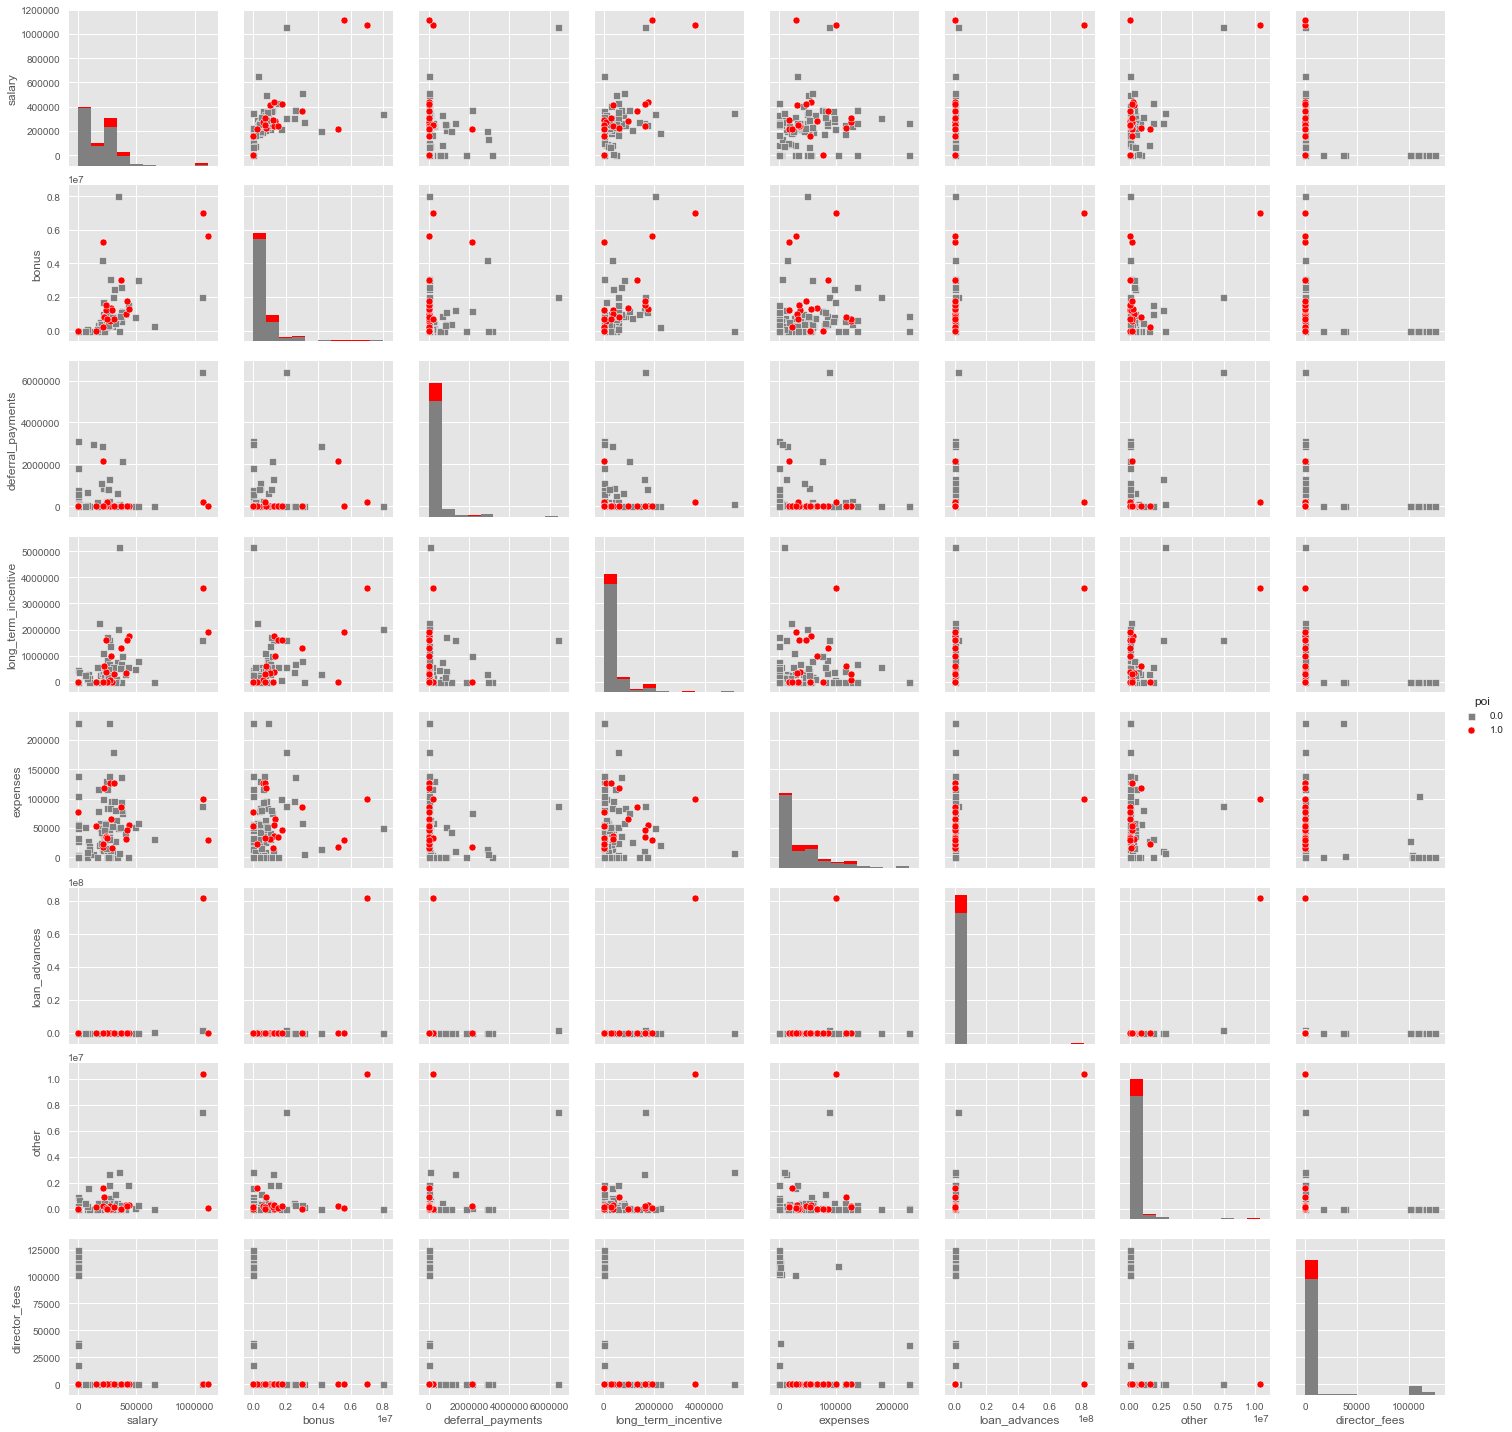

In [50]:
salary = ['salary',
          'bonus', 
          'deferral_payments',           
          'long_term_incentive',
          'expenses', 
          'loan_advances', 
          'other', 
          'director_fees']

sb.pairplot(data=enron_df, vars=salary, hue="poi", markers=['s','o'], palette=['gray','red'])

In the chart we can see how we have some outliers in the financial data usually associated with a POI.

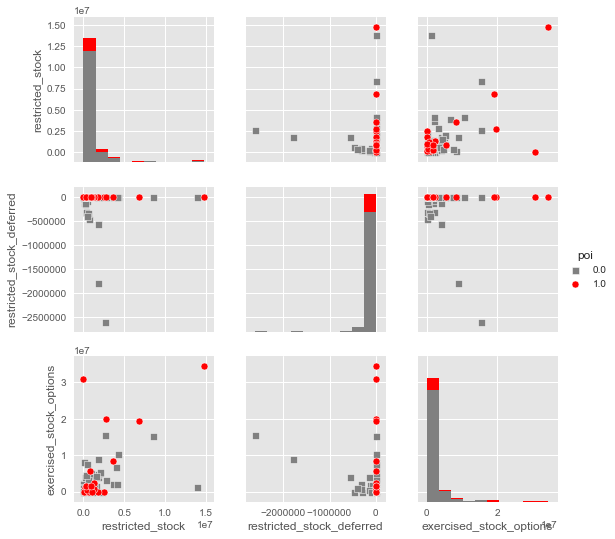

In [51]:
stock = ["restricted_stock", 
         "restricted_stock_deferred",
         "exercised_stock_options"]

sb.pairplot(data=enron_df, vars=stock, hue="poi", markers=['s','o'], palette=['gray','red'])

Total payments and total stock value by POI and not POI:

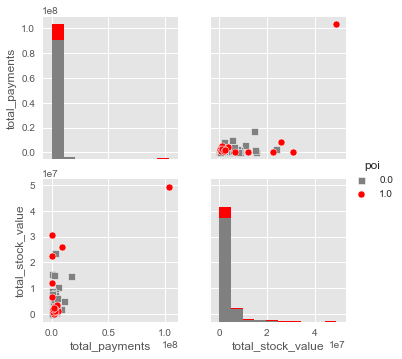

In [52]:
sb.pairplot(data=enron_df, vars=["total_payments", "total_stock_value"], hue="poi", markers=['s','o'], palette=['gray','red'])

# 4. Statistical correlation

Let's see how the variables correlate with each other.

In [53]:
enron_df.corr()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person
salary,1.000000,0.647775,0.558284,-0.328233,0.240514,0.389115,0.545623,0.328852,-0.296119,0.527077,0.418395,0.523929,0.017200,0.496443,0.392492,0.507932,0.141653,0.204263,0.337557,0.403703
bonus,0.647775,1.000000,0.496066,-0.330186,0.172411,0.432665,0.383044,0.226031,-0.171758,0.570407,0.393905,0.415356,0.049921,0.444001,0.518007,0.663496,0.173099,0.447576,0.357575,0.639678
long_term_incentive,0.558284,0.496066,1.000000,-0.295036,0.117745,0.402171,0.534620,0.080923,-0.153570,0.530105,0.378215,0.334845,0.043820,0.405729,0.189811,0.276782,0.053834,0.155133,0.255434,0.264734
deferred_income,-0.328233,-0.330186,-0.295036,1.000000,-0.542680,-0.024995,-0.265064,-0.030788,0.071196,-0.107702,-0.254483,-0.119872,0.079049,-0.234626,-0.119875,-0.234670,-0.013711,-0.003584,-0.273513,-0.193344
deferral_payments,0.240514,0.172411,0.117745,-0.542680,1.000000,0.014256,0.368423,-0.030386,-0.092463,0.145195,0.107530,0.081826,-0.007112,0.110232,0.122230,0.208086,0.027892,0.000789,-0.041085,0.215175
loan_advances,0.389115,0.432665,0.402171,-0.024995,0.014256,1.000000,0.759393,0.117600,-0.026820,0.972882,0.552024,0.584736,0.016802,0.620756,0.115184,0.137049,-0.019833,-0.010062,0.220070,0.100186
other,0.545623,0.383044,0.534620,-0.265064,0.368423,0.759393,1.000000,0.129606,-0.081216,0.838219,0.530993,0.636348,0.038562,0.621657,0.105098,0.179572,-0.055084,-0.050179,0.169551,0.159493
expenses,0.328852,0.226031,0.080923,-0.030788,-0.030386,0.117600,0.129606,1.000000,-0.127600,0.153163,0.155986,0.179727,-0.154792,0.173073,0.228256,0.273387,0.146490,0.123454,0.190771,0.129817
director_fees,-0.296119,-0.171758,-0.153570,0.071196,-0.092463,-0.026820,-0.081216,-0.127600,1.000000,-0.074258,-0.131333,-0.140510,0.051880,-0.145693,-0.172225,-0.204484,-0.078321,-0.096571,-0.117879,-0.163455
total_payments,0.527077,0.570407,0.530105,-0.107702,0.145195,0.972882,0.838219,0.153163,-0.074258,1.000000,0.581989,0.630040,0.032998,0.659446,0.201784,0.257661,0.011137,0.065327,0.248067,0.222776


As you can see POI has the strongest relationship with the variables salary (0.34), bonus (0.36) , exercised_stock_options (0.37).

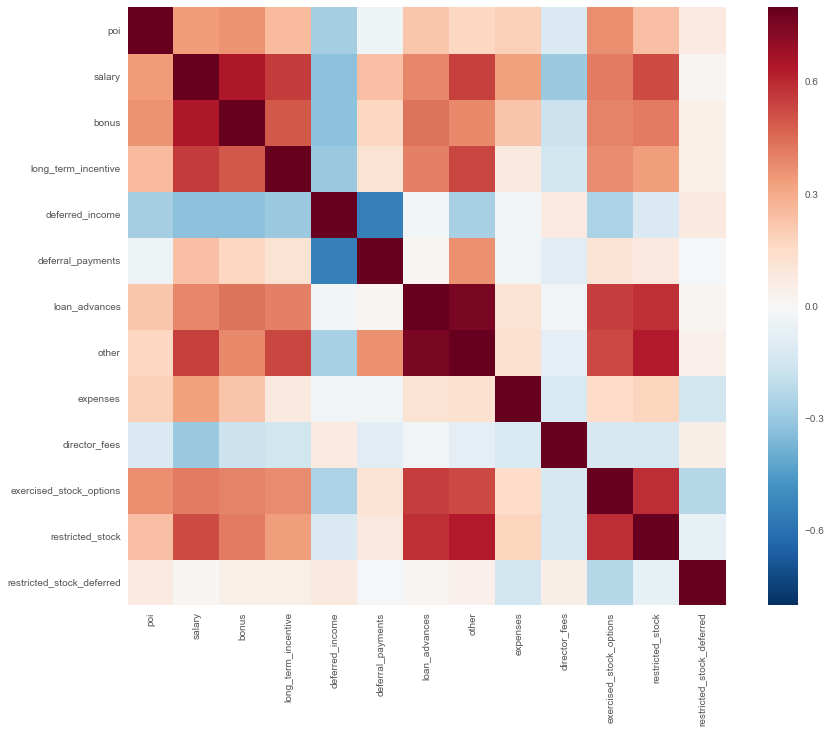

In [78]:
corr_features_plot = ['poi','salary', 'bonus', 'long_term_incentive', 'deferred_income','deferral_payments',
                     'loan_advances', 'other', 'expenses', 'director_fees',    
                     'exercised_stock_options','restricted_stock', 'restricted_stock_deferred'
                     ]
# Compute the correlation matrix
corr = enron_df[corr_features_plot].corr()

f, ax = plt.subplots(figsize=(15, 11))

# Draw the heatmap using seaborn
sb.heatmap(corr, vmax=.8, square=True);